#Инструкция по запуску:

После выполнения первой ячейки есть вероятность увидеть следующее изображение:

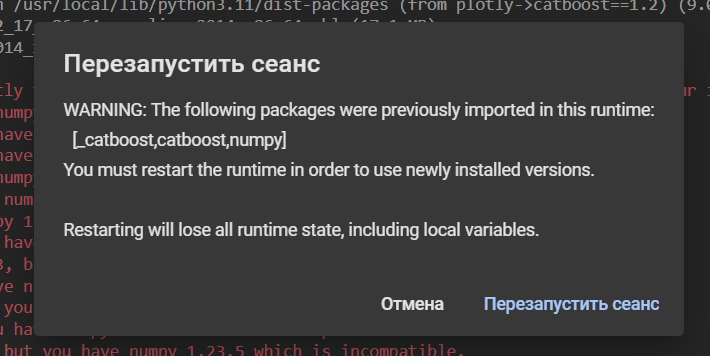

Если Вы столкнулись с данной проблемой, то нужно перезапустить сеанс и снова запустить первую ячейку, она снова выдаст это предупреждение, но в этот раз перезапускать сеанс уже не нужно, нужно просто запускать ячейки дальше.

#Установка необходимых библиотек

In [1]:
!pip uninstall numpy catboost -y
!pip install numpy==1.23.5 catboost==1.2

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: catboost 1.2
Uninstalling catboost-1.2:
  Successfully uninstalled catboost-1.2
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached catboost-1.2-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached catboost-1.2-cp311-cp311-manylinux2014_x86_64.whl (98.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is inc

In [2]:
!pip install phik

In [3]:
!pip install statsmodels

#Загрузка датасета

In [4]:
!gdown 1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt

Downloading...
From (original): https://drive.google.com/uc?id=1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt
From (redirected): https://drive.google.com/uc?id=1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt&confirm=t&uuid=fc591375-9e72-493d-a5cb-35df72e4ab95
To: /content/CupIT_Sber_data.csv
100% 230M/230M [00:02<00:00, 102MB/s]


#Первичный анализ

In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/CupIT_Sber_data.csv', sep=';')

In [6]:
data.head(10)

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00.0000000,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00.0000000,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00.0000000,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00.0000000,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00.0000000,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0
5,0x9792A4526F5FAFFA2537A6526B6AC23C,0xE02E4412BB1F637FC4CDAFC793C4F7A4,2022-01-01 12:31:00.0000000,1720,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x129AB4F27EAA6C675A4E116AB616FE48,0x95758EBA87326C4D5DECC8B51A8B9C61,0
6,0x750447893A808F22D0E7BEBDADB58999,0xC97D0DF950D35FA4AF2655D749259B36,2022-01-01 12:46:00.0000000,1160,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x887078A50C93C3DFCCF23B6656BF767B,0x780F9A97F1A590D0CE88314FC065E5C8,0
7,0x07EA51E045B591DC5FBA5C1E6D7DEA4B,0x04848F8B05C6935CCECC26FB024BDC6E,2022-01-01 12:41:00.0000000,1720,0x405E158AE7F0523296EB12EECD73CD79,0x82078385014C595F44D63882A268F47A,0x95758EBA87326C4D5DECC8B51A8B9C61,0
8,0x32B405A9613D446FF83E2E73867A1B49,0xBBAF849258EA3A4CE4B58D2C7686775C,2022-01-01 12:55:00.0000000,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0x54054703A9278593F2C779D0E128A3A6,0x95758EBA87326C4D5DECC8B51A8B9C61,0
9,0x13781E636B106FF5B49921B1412BF3F5,0x8D8D44EEDA40B1AE7B659A5A738BF4F3,2022-01-01 12:59:00.0000000,312,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0


Сортируем по дате

In [7]:
data.sort_values(by='service_date')

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00.0000000,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00.0000000,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0
209,0x52EC5F105E1A112873CE07084FEE2244,0xAE125696322F73FD958DF6FE423A38F5,2022-01-01 12:20:00.0000000,425,0x4722B1782AB7DC9B16B2CC933C2A9E52,0xBD46A7B2FCD9FC493D8E2EDBE225C9D1,0x01D029DF0704C6B5891DF7C601181E4D,0
208,0x70DD8F04A3C25809711899976DB2E8BA,0x85693A3739998C3F26FA037A6C7DC77E,2022-01-01 12:20:00.0000000,1921,0x4722B1782AB7DC9B16B2CC933C2A9E52,0xD913F10965FA2B60C031D03112BD3D02,0x7AE965F70DAE2CDB24F3B08C0B4C6CE8,0
206,0xD73A30C89136B625560F01F20F642148,0x476385497B98C5D85BBB966E8BCB3319,2022-01-01 12:20:00.0000000,"1640,5",0x4722B1782AB7DC9B16B2CC933C2A9E52,0x1CFFA4B1194317ABBF88267E29739718,0x9A574462105283982706076B43E656BD,0
...,...,...,...,...,...,...,...,...
1090977,0x8EEF0D22F0F1B091608B6231133C8DD4,0x500BDC514F2A9C63F9C1968A0B7CE2C0,2023-12-31 17:34:00.0000000,"13,71",0xCAD93EDD7E8593190FB7D3728D66D1BD,0x2165571DB4EF41EECCD050DD1C4FABAA,0xFC98F1E83B20FA30BEC6DF7BB4D02D74,0
1090968,0xBF7CBE9DAB91FE33214440D65CB8CA06,0x9C7000465DE80BB0C1613E44CF368DCD,2023-12-31 17:34:00.0000000,"1518,07",0xCAD93EDD7E8593190FB7D3728D66D1BD,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0
1090967,0x8AC66E4A3F207ACCEF340C6ACA3C11A6,0xFAA7695E600E871E9CD64EC250D5D4EC,2023-12-31 17:34:00.0000000,7138,0xCAD93EDD7E8593190FB7D3728D66D1BD,0xA5B4D2DDE961BEFC2BAC5E8960382A6E,0x834A7BF96A7A752F8D58493F50C9D8CB,0
1090970,0x836224ABD4E4279297958899C88B57E5,0x3A7408F89C37D813F95C5DE6B9CB10D3,2023-12-31 18:48:00.0000000,13500,0x654E6D737A7C1A4906758D4EF75C6076,0x3E6A29A25856B94A9BA989AC6D182545,0x266F51CD4CE99C60838643DC48070979,0


In [8]:
data.describe()

,is_hospital
count,1.091043e+06
mean,9.259488e-02
std,2.898640e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091043 entries, 0 to 1091042
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   service_document_id  1091043 non-null  object
 1   account_document_id  1091043 non-null  object
 2   service_date         1091043 non-null  object
 3   service_amount_net   1091043 non-null  object
 4   patient_id           1091043 non-null  object
 5   service_code         1091043 non-null  object
 6   service_name         1091043 non-null  object
 7   is_hospital          1091043 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 66.6+ MB


In [10]:
data.loc[data['service_name'] == '0x95758EBA87326C4D5DECC8B51A8B9C61', 'service_code'].value_counts()

,count
service_code,
0xCDEA5658E0AD52E1700653CAE2A4928D,16780
0x332E8D3220A5317B23558A5E79CE00E4,14832
0x54054703A9278593F2C779D0E128A3A6,11057
0x4F8A79924D1B8D817FC07D5B0814052F,9891
0xC9178011BA3F7F60E28BFE503478E35B,9400
...,...
0x7F14EA1DA585FE31B064B97627646157,1
0xB6F9224310282FFF00065E7989E58BAB,1
0x34550D9F86B74F6885E46B35819F3130,1


In [11]:
data.loc[data['service_code'] == '0xCDEA5658E0AD52E1700653CAE2A4928D', 'service_name'].value_counts()

,count
service_name,
0x95758EBA87326C4D5DECC8B51A8B9C61,16780


Получается, service_name - категории, а service_code - подкатегории в этих категориях

In [12]:
data['service_document_id'].value_counts()[data['service_document_id'].value_counts() > 1]

,count
service_document_id,
0x15075263622836BE21F6ACB4FA8E4BF3,5
0x864FB272E89454CD72197128F400BAAC,3
0x633F8A146E95A4D3658B22B260C75196,3
0xBE186EFDA44422D591A558F8CBE28564,3
0xDA04A42EC25E7DF616078B7DA0E8FC5E,3
...,...
0x73E0EAEAC5E8E5283C798E394D1F29DB,2
0x78AB2DBC1B41C19920E934B5401E71B2,2
0xD6E1F1B7FC9447677271FAB94421F536,2


In [13]:
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
298369,0x15075263622836BE21F6ACB4FA8E4BF3,0xE3AD0B25AAB74181C30E1895104D2C04,2022-07-31 18:07:00.0000000,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0
394920,0x15075263622836BE21F6ACB4FA8E4BF3,0x025EEF6559D288810B72E30DA01C72BC,2022-10-06 15:57:31.0000000,-2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0
394921,0x15075263622836BE21F6ACB4FA8E4BF3,0xC957FFB34F7C95C41DA082B6ECB21592,2022-10-06 15:57:31.0000000,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0
394922,0x15075263622836BE21F6ACB4FA8E4BF3,0x5220BB151561EBCC97CE43EAFC084896,2022-10-06 15:57:57.0000000,-2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0
394923,0x15075263622836BE21F6ACB4FA8E4BF3,0x6B0CF840E51EF9A9B86E19CB514FB490,2022-10-06 15:57:57.0000000,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0


In [14]:
data['patient_id'].value_counts()

,count
patient_id,
0x037AB9CF4BAF80A173679FB9761A113D,4121
0xAECAFBEC992080A28B6351DC1E1551C2,2165
0x274B520D2D54E1604C6E69410A728CE0,1959
0xEA73B2A80C0D9647C3ABFA65195CFCBE,1951
0x53A2C720806E07E267EE2E32C7EEB8DF,1324
...,...
0x19EDCF485328554ED36D46FEB7429725,1
0xBAE4DC6D24E85E885E83CD0AC506006A,1
0x050E88F1CA218A5B25DF517448D9B6C4,1


#Добавление новых признаков

Добавление временных признаков

In [15]:
def add_date_time_columns(df, date_column):

    df[date_column] = pd.to_datetime(df[date_column])

    df['year'] = df[date_column].dt.year
    df['month'] = df[date_column].dt.month
    df['date'] = df[date_column].dt.date
    df['time'] = df[date_column].dt.time
    df['hour'] = df[date_column].dt.hour
    df['day'] = df[date_column].dt.day

    return df

In [16]:
data = add_date_time_columns(data, 'service_date')

In [17]:
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Добавление колонки с днями недели

In [19]:
#день недели
from datetime import datetime
import numpy as np
days_ru = {
    0: "ПН",
    1: "ВТ",
    2: "СР",
    3: "ЧТ",
    4: "ПТ",
    5: "СБ",
    6: "ВС"
}
data['weekday_name'] = np.vectorize(lambda x: days_ru[x.weekday()])(data['date'])
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ


Добавление колонки с выходными

In [20]:
#выходные
#1-выходной, 0-нет

def wknd(x):
    if x == 'СБ' or x == 'ВС':
        return 1
    else:
        return 0
data['weekends'] = np.vectorize(wknd)(data['weekday_name'])
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name,weekends
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ,1


Добавление колонки с праздниками

In [21]:
#праздники
#1-праздник, 0-нет
def hld(x):
    m = [
        '2022-01-01',
        '2022-01-02',
        '2022-01-03',
        '2022-01-04',
        '2022-01-05',
        '2022-01-06',
        '2022-01-07',
        '2022-01-08',
        '2022-02-23',
        '2022-03-08',
        '2022-05-01',
        '2022-05-09',
        '2022-06-12',
        '2022-11-04',
        '2022-05-03',
        '2022-05-10',
        '2022-03-07',
        '2023-01-01',
        '2023-01-02',
        '2023-01-03',
        '2023-01-04',
        '2023-01-05',
        '2023-01-06',
        '2023-01-07',
        '2023-01-08',
        '2023-02-23',
        '2023-03-08',
        '2023-05-01',
        '2023-05-09',
        '2023-06-12',
        '2023-11-04',
        '2023-02-24',
        '2023-05-08'
    ]
    if x in m:
        return 1
    else:
        return 0
data['holidays'] = np.vectorize(hld)(data['date'].astype(str))

Заменили значения в service_amount_net со строк на числа

In [22]:
data['service_amount_net'] = data['service_amount_net'].str.replace(',', '.', regex=False)

In [23]:
data['service_amount_net'] = data['service_amount_net'].astype(float)

In [24]:
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name,weekends,holidays
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.0,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ,1,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.0,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ,1,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.0,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ,1,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.0,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ,1,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.0,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ,1,1


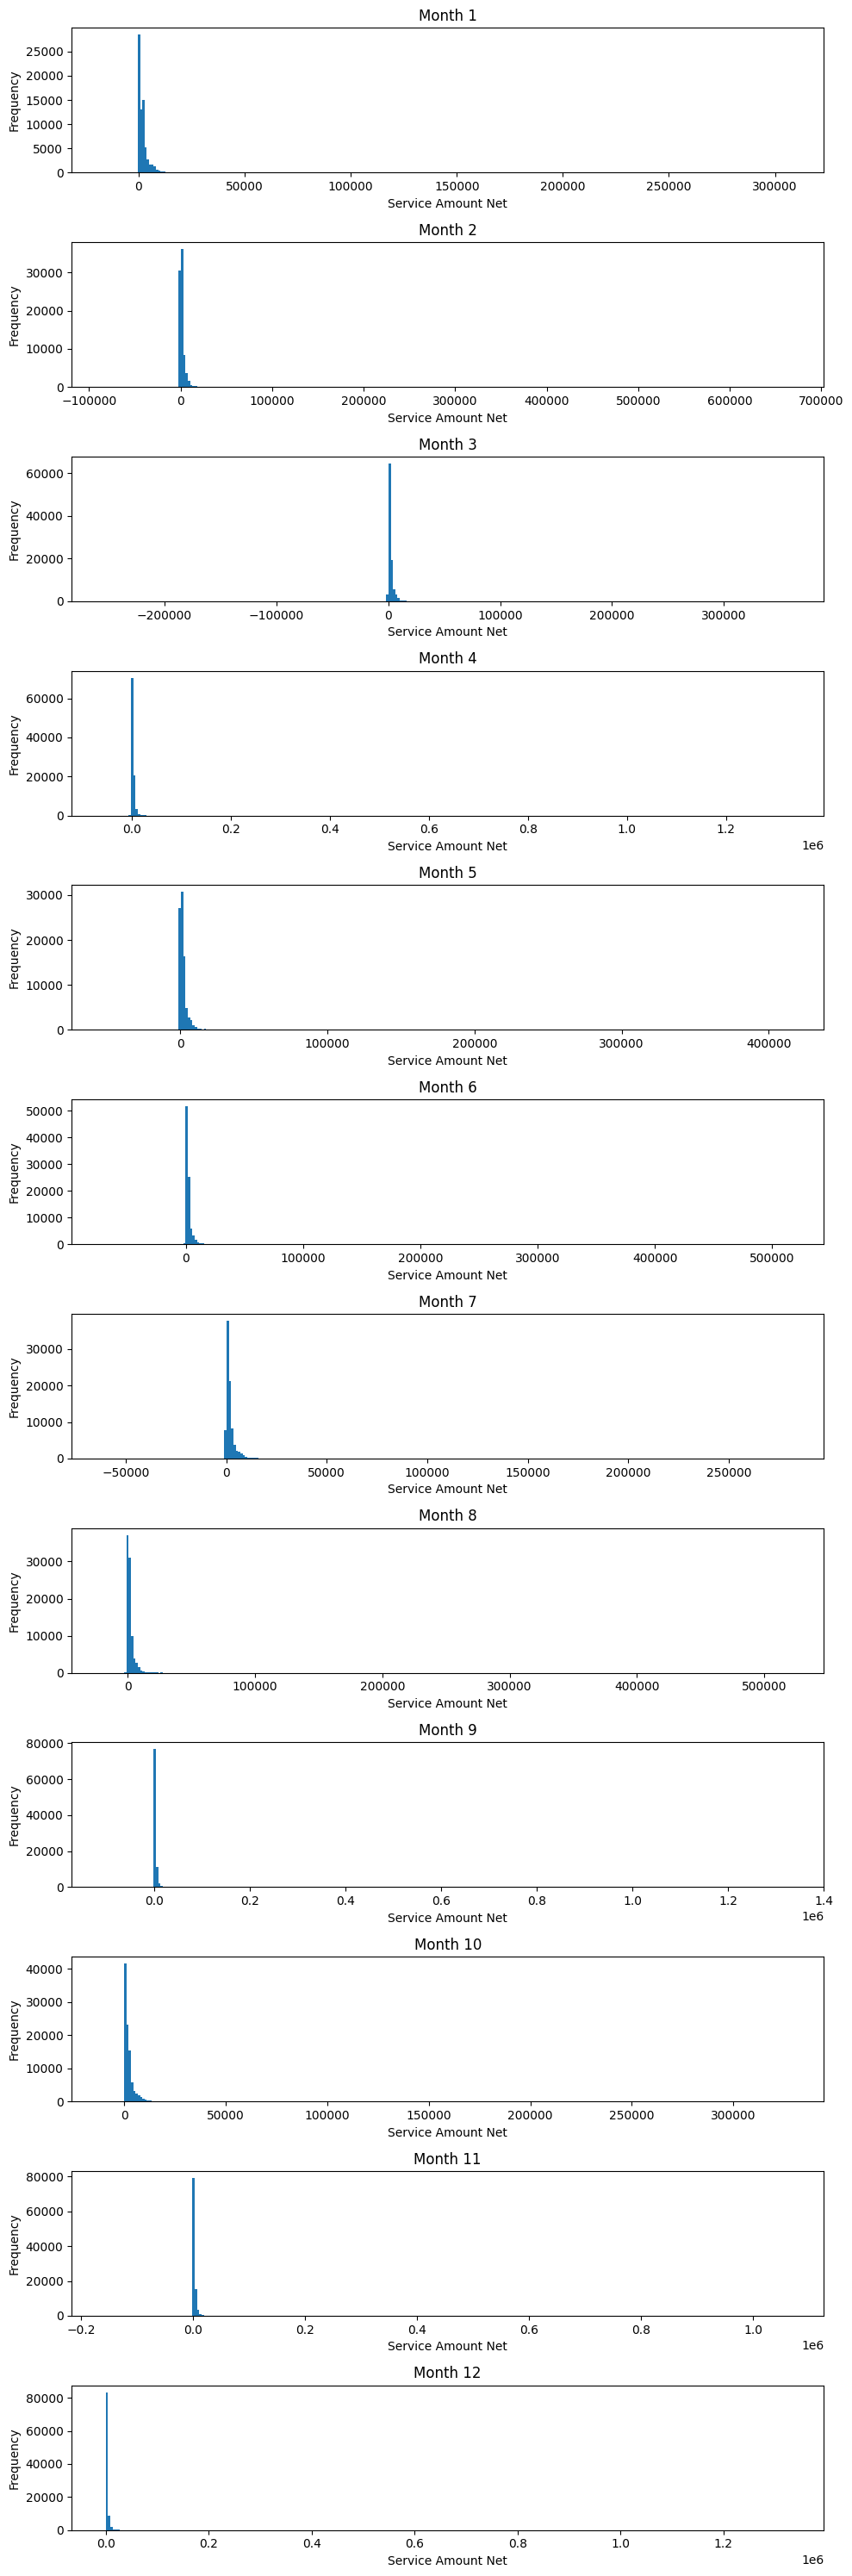

In [25]:
fig, axes = plt.subplots(12, 1, figsize=(10, 30))
for i in range(1, 13):
    data_month = data.loc[(data['month'] == i) &
                         (data['service_amount_net'] > -10000000) &
                         (data['service_amount_net'] < 10000000)]
    axes[i-1].hist(data_month['service_amount_net'], bins=300)
    axes[i-1].set_title(f'Month {i}')
    axes[i-1].set_xlabel('Service Amount Net')
    axes[i-1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Добавление колонок со статистиками service_amount_net по service_code

In [26]:
def add_service_code_statistics(df):
    grouped = df.groupby('service_code')['service_amount_net'].agg(
        service_code_mean='mean',
        service_code_median='median',
        service_code_std='std'
    ).reset_index()

    df = df.merge(grouped, on='service_code', how='left')

    return df

In [27]:
data = add_service_code_statistics(data)

In [28]:
data['service_code_std'] = data['service_code_std'].fillna(0)

Добавление колонок со статистиками service_amount_net по service_name

In [29]:
def add_service_name_statistics(df):
    grouped = df.groupby('service_name')['service_amount_net'].agg(
        service_name_mean='mean',
        service_name_median='median',
        service_name_std='std'
    ).reset_index()

    df = df.merge(grouped, on='service_name', how='left')

    return df

In [30]:
data = add_service_name_statistics(data)
data['service_name_std'] = data['service_name_std'].fillna(0)
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,...,day,weekday_name,weekends,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.0,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,1,СБ,1,1,2288.290331,2104.0,844.972010,2736.985463,2208.0,2045.034290
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.0,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,...,1,СБ,1,1,5176.288072,4639.8,2189.748316,5176.288072,4639.8,2189.748316
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.0,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,...,1,СБ,1,1,1682.299101,1395.2,925.269174,2388.233015,1453.5,2341.395651
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.0,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,...,1,СБ,1,1,1725.591607,1700.0,544.285041,1725.591607,1700.0,544.285041
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.0,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,1,СБ,1,1,2353.000907,2104.0,1157.653136,2736.985463,2208.0,2045.034290


Добавление колонки с временным интервалом между первой и последней датами сторнированных операций

Внимание, эта ячейка выполняется примерно 6 минут

In [ ]:
data['delta_time'] = data.groupby('service_document_id')['service_date'].transform(lambda x: x.max() - x.min())
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

Добавление колонки с количеством операций по одному service_document_id и колонки со стандартным отклонением service_amount_net в пределах одного service_document_id

In [ ]:
data['correction_count'] = data.groupby('service_document_id')['service_amount_net'].transform('count')
data['amount_std'] = data.groupby('service_document_id')['service_amount_net'].transform('std')

In [ ]:
data['correction_count'].value_counts()

Обработка сторнирования

In [ ]:
result_data = data.groupby('service_document_id', as_index=False).agg({
    'service_amount_net': 'sum',
    'service_date': 'first'
})

In [ ]:
result_data.loc[result_data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

In [ ]:
merged_df = pd.merge(result_data, data, on='service_document_id', suffixes=('_agg', '_original'))

data = merged_df.drop_duplicates(subset='service_document_id')
data.drop(columns=['service_date_original', 'service_amount_net_original'], inplace=True)

In [ ]:
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

In [ ]:
data = data.rename(columns={'service_amount_net_agg': 'service_amount_net', 'service_date_agg': 'service_date'})
data

In [ ]:
data = data.loc[data['service_amount_net'] >= 0]
data.info()

In [ ]:
data['amount_std'] = data['amount_std'].fillna(0)

In [ ]:
data.info()

Проверка влияния сезонных акций СберСтрахования на целевую переменную service_amount_net

In [ ]:
def add_rpss2022(date):
    return 1 if pd.Timestamp("2022-11-28") <= date <= pd.Timestamp("2023-01-31") else 0

def add_save25(date):
    return 1 if pd.Timestamp("2022-02-04") <= date <= pd.Timestamp("2022-02-20") else 0

def add_dedmoroz(date):
    return 1 if pd.Timestamp("2022-01-01") <= date <= pd.Timestamp("2022-01-20") else 0

def add_greenday(date):
    return 1 if pd.Timestamp("2023-11-09") <= date <= pd.Timestamp("2023-11-12") else 0

def add_skidkanastrovku(date):
    return 1 if pd.Timestamp("2023-10-10") <= date <= pd.Timestamp("2023-11-08") else 0

def add_rpss2023(date):
    return 1 if pd.Timestamp("2023-06-13") <= date <= pd.Timestamp("2023-08-31") else 0

def add_sberagifinancy(date):
    return 1 if pd.Timestamp("2023-05-29") <= date <= pd.Timestamp("2023-07-09") else 0

In [ ]:
data["RPSS2022"] = data["service_date"].apply(add_rpss2022)
data["SAVE25"] = data["service_date"].apply(add_save25)
data["DEDMOROZ"] = data["service_date"].apply(add_dedmoroz)
data["GREENDAY"] = data["service_date"].apply(add_greenday)
data["SKIDKANASTRAHOVKU"] = data["service_date"].apply(add_skidkanastrovku)
data["RPSS2023"] = data["service_date"].apply(add_rpss2023)
data["SBEREGIFINANCY"] = data["service_date"].apply(add_sberagifinancy)

In [ ]:
num_cols = ['service_amount_net', "RPSS2022", "SAVE25", "DEDMOROZ", "GREENDAY", "SKIDKANASTRAHOVKU", "RPSS2023", "SBEREGIFINANCY"]

In [ ]:
corr = data[num_cols].corr()
sns.heatmap(corr)

In [ ]:
import statsmodels.api as sm

In [ ]:
akcii = ["RPSS2022", "SAVE25", "DEDMOROZ", "GREENDAY", "SKIDKANASTRAHOVKU", "RPSS2023", "SBEREGIFINANCY"]

In [ ]:
X = sm.add_constant(data[['service_amount_net']])
for i in range(len(akcii)):
    y = data[akcii[i]]

    logit_model = sm.Logit(y, X)
    result = logit_model.fit()

    #print(result.summary())
    pseudo_r2 = result.prsquared
    print(f'\n{akcii[i]}: \n')
    print(f"Pseudo R-squared: {pseudo_r2}")

    llr_pvalue = result.llr_pvalue
    print(f"p-value for Likelihood Ratio Test: {llr_pvalue} \n")

In [ ]:
data = data.drop(columns=["RPSS2022", "SAVE25", "DEDMOROZ", "GREENDAY", "SKIDKANASTRAHOVKU", "SBEREGIFINANCY"])

#Подготовка данных к передаче в модель

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

data_linear = data.drop(columns=['service_document_id', 'account_document_id', 'time', 'service_code_median', 'service_name_std', 'service_name_mean', 'service_name_median', 'service_code_std'])

round_to_month = data_linear['service_date'].dt.to_period('M') #.dt.to_timestamp()
data_linear["service_date_month"] = round_to_month.dt.strftime('%Y-%m')

data_linear = data_linear.sort_values(by='service_date')
#data_linear = data_linear.drop(columns=['service_date'])

oe = OrdinalEncoder()
data_linear[['patient_id', 'service_code', 'service_name', 'weekday_name']] = oe.fit_transform(data_linear[['patient_id', 'service_code', 'service_name', 'weekday_name']])

data_linear = data_linear.set_index('service_date') # service_date_month
data_linear['delta_seconds'] = data_linear['delta_time'].dt.total_seconds()
data_linear = data_linear.drop(columns=['delta_time'])

data_linear.index = data_linear.index.floor('H')
data_linear.head()
# data_linear.info()



Агрегирование данных по дням

In [ ]:
aggregated_data = data_linear.resample('D').agg({
    'service_amount_net': 'sum',
    'is_hospital': 'sum',
    'weekday_name': 'first',
    'weekends': 'first',
    'holidays': 'first',
    'service_code_mean': 'sum',
    'delta_seconds': 'mean',
    'correction_count': 'sum',
    'amount_std': 'mean',
    'service_date_month': 'first',
    'date': 'first',
    'year': 'first',
    'month': 'first',
    'day': 'first',
})
aggregated_data

Добавление колонки с инфляцией

In [ ]:
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])
if 'inflation' in aggregated_data.columns:
    aggregated_data = aggregated_data.drop(columns=['inflation'])
inflation_values = [
    8.73, 9.15, 16.69, 17.83, 17.1, 15.9, 15.1, 14.3, 13.68, 12.63, 11.98, 11.94,
    11.77, 10.99, 3.51, 2.31, 2.51, 3.25, 4.3, 5.15, 6, 6.69, 7.48, 7.42, 7.44
]
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2024-01-01')
monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
inflation_df = pd.DataFrame({
    'date': monthly_dates,
    'inflation': inflation_values
})
aggregated_data = pd.merge(left=aggregated_data, right=inflation_df, on='date', how='outer')
aggregated_data['inflation'] = aggregated_data['inflation'].interpolate(method='linear', limit_direction='backward')
aggregated_data = aggregated_data[:-1]
aggregated_data['service_date'] = aggregated_data['date']
aggregated_data.set_index('service_date', inplace=True)
aggregated_data

Загрузка файла с информацией о ценах акций Сбера

In [ ]:
!gdown 1ui20hkU7VytT7HIa1B0EssK3rd5gQyTz

Добавление колонки с ценами акций Сбера

In [ ]:
if 'stock_price' in aggregated_data.columns:
    aggregated_data = aggregated_data.drop(columns=['stock_price'])
import pandas as pd
file_path = '/content/SBER.csv'
stock_data = pd.read_csv(file_path)
stock_data['Дата'] = pd.to_datetime(stock_data['Дата'], format='%d.%m.%Y')
stock_data = stock_data.rename(columns={'Цена': 'stock_price'})
stock_data = stock_data[['Дата', 'stock_price']]
stock_data = stock_data.rename(columns={'Дата': 'date'})
stock_data['stock_price'] = stock_data['stock_price'].str.replace(',', '.', regex=False).astype(float)
time_df = pd.DataFrame({'date': pd.date_range(start='2021-12-30', end='2024-01-01', freq='D')})
time_df = time_df.merge(stock_data, on='date', how='left')
time_df['stock_price'] = time_df['stock_price'].interpolate(method='linear')
time_df = time_df[time_df['date'].between('2022-01-01', '2023-12-31')]
aggregated_data = pd.merge(left=aggregated_data, right=time_df, on='date', how='left')
aggregated_data['service_date'] = aggregated_data['date']
aggregated_data.set_index('service_date', inplace=True)
aggregated_data

Добавление колонки с сезонной акцией СберСтрахования

In [ ]:
def add_rpss2023(date):
    return 1 if pd.Timestamp("2023-06-13") <= date <= pd.Timestamp("2023-08-31") else 0
aggregated_data["RPSS2023"] = aggregated_data["date"].apply(add_rpss2023)
aggregated_data.head()

In [ ]:
aggregated_data.isna().sum()

In [ ]:
print(aggregated_data.index.duplicated().sum())

In [ ]:
aggregated_data.info()

In [ ]:
aggregated_data['service_amount_net'].mean()

Матрица корреляций колонок aggregated_data

In [ ]:
columns_to_exclude = ['service_document_id', 'account_document_id', 'service_date', 'date', 'time', 'patient_id', 'service_code', 'service_name', 'weekday_name',]
data_reduced = aggregated_data.drop(columns=['date', 'service_date_month'])

correlation_matrix = data_reduced.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5
)
plt.title("Корреляционная матрица")
plt.tight_layout()
plt.show()

Матрица phik-корреляций колонок aggregated_data

In [ ]:
p_o = aggregated_data.drop(columns=['date', 'service_date_month']).phik_matrix().round(2).sort_values('service_amount_net')

plot_correlation_matrix(p_o.values,
                        x_labels=p_o.columns,
                        y_labels=p_o.index,
                        vmin=0,
                        vmax=1,
                        color_map="Greens",
                        fontsize_factor=0.8,
                        figsize=(11, 6)
                        )
plt.tight_layout()

Исследование service_amount_net на стационарность

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt


def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return

tsplot(aggregated_data['service_amount_net'], lags=30)

#Первый прототип модели

Прототип модели SARIMAX

In [ ]:
# 0   service_amount_net  730 non-null    float64  goal
#  1   is_hospital         730 non-null    int64   ??
#  2   weekday_name        730 non-null    float64 -
#  3   weekends            730 non-null    int64   +
#  4   holidays            730 non-null    int64   -
#  5   service_code_mean   730 non-null    float64 ???
#  6   delta_seconds       730 non-null    float64 +?
#  7   correction_count    730 non-null    int64   +
#  8   amount_std          730 non-null    float64 ???
#  9   service_date_month  730 non-null    object  -
#  10  date                730 non-null    object  -
#  11  year                730 non-null    int32   -
#  12  month               730 non-null    int32   +
#  13  day                 730 non-null    int32   -
#  14  RPSS2023            730 non-null    int64   ??
#      iflation                                    ?
#      akcii                                       ?

unique_months = aggregated_data['service_date_month'].unique()

train_months = unique_months[:12]
test_months = unique_months[-12:]

X_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_train.drop(columns=['service_date_month'])
X_test.drop(columns=['service_date_month'])

y_train = X_train[['service_amount_net']]
y_test = X_test[['service_amount_net']]

X_train_ex=X_train[['weekends','month', ]]
X_test_ex=X_test[['weekends', 'month', ]]

sd = StandardScaler()
X_train_ex = sd.fit_transform(X_train_ex)
X_test_ex = sd.transform(X_test_ex)

y_train = sd.fit_transform(y_train)
y_test = sd.transform(y_test)

mod = SARIMAX(y_train,
              exog=X_train_ex,
              order=(1, 0, 1), # 1, 0, 4
              trend=[0, 0], # 1, 0
              seasonal_order=(0, 0, 0, 12) # 1, 1, 1
              )

res = mod.fit()
print(res.summary())
forecast = res.forecast(steps=X_test.shape[0], exog=X_test_ex) #

plt.figure(figsize=(25, 6))

plt.plot(X_test.index, y_test, label='test')
plt.plot(X_test.index, forecast, label='predicted')
plt.legend()
plt.show()

In [ ]:
(sd.inverse_transform(forecast.reshape(-1, 1)) < 0).sum()

In [ ]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
mse = mean_squared_error(sd.inverse_transform(y_test.reshape(-1, 1)), sd.inverse_transform(forecast.reshape(-1, 1)))
mae = mean_absolute_error(sd.inverse_transform(y_test.reshape(-1, 1)), sd.inverse_transform(forecast.reshape(-1, 1)))
mape = mean_absolute_percentage_error(sd.inverse_transform(y_test.reshape(-1, 1)), sd.inverse_transform(forecast.reshape(-1, 1)))

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

In [ ]:
X_month = X_test[['service_amount_net', 'service_date_month']]
X_month['forecast'] = sd.inverse_transform(forecast.reshape(-1, 1))
X_month_agg = X_month.groupby('service_date_month').agg({
    'service_amount_net': 'sum',
    'forecast': 'sum'
})
print('MAE: ', mean_absolute_error(X_month_agg['service_amount_net'], X_month_agg['forecast']))
print('MAPE: ', mean_absolute_percentage_error(X_month_agg['service_amount_net'], X_month_agg['forecast']))

#Предсказание переменных для итоговой модели

In [ ]:
from catboost import CatBoostRegressor

Проверка delta_seconds на стационарность

In [ ]:
tsplot(aggregated_data['delta_seconds'], lags=30)

Предсказание delta_seconds

In [ ]:
unique_months = aggregated_data['service_date_month'].unique()

#  2   weekday_name        730 non-null    float64   +
#  3   weekends            730 non-null    float64   +
#  4   holidays            730 non-null    float64   +
#  11  year                730 non-null    float64   -
#  12  month               730 non-null    float64   +
#  13  day                 730 non-null    float64   +
#  14  inflation           730 non-null    float64   -
#  15  RPSS2023            730 non-null    int64     -
#  16  stock_price         730 non-null    float64   -

train_months = unique_months[:12]
test_months = unique_months[-12:]

X_code_mean_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_code_mean_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_code_mean_train.drop(columns=['service_date_month'])
X_code_mean_test.drop(columns=['service_date_month'])

y_code_mean_train = X_code_mean_train[['delta_seconds']]
y_code_mean_test = X_code_mean_test[['delta_seconds']]

X_code_mean_train_ex=X_code_mean_train[['weekends', 'month', 'day', 'weekday_name', 'holidays']]
X_code_mean_test_ex=X_code_mean_test[['weekends', 'month', 'day', 'weekday_name', 'holidays']]

sd = StandardScaler()
X_code_mean_train_ex = sd.fit_transform(X_code_mean_train_ex)
X_code_mean_test_ex = sd.transform(X_code_mean_test_ex)

y_code_mean_train = sd.fit_transform(y_code_mean_train)
y_code_mean_test = sd.transform(y_code_mean_test)

model_code_mean = SARIMAX(y_code_mean_train,
              exog=X_code_mean_train_ex,
              order=(1, 0, 1), # 1, 0, 4
              trend=[0, 0], # 1, 0
              seasonal_order=(0, 0, 0, 12) # 1, 1, 1
              )

res_code_mean = model_code_mean.fit()
print(res_code_mean.summary())
forecast_code_mean = res_code_mean.forecast(steps=X_code_mean_test.shape[0], exog=X_code_mean_test_ex) #

plt.figure(figsize=(25, 6))

plt.plot(X_code_mean_test.index, y_code_mean_test, label='delta_seconds')
plt.plot(X_code_mean_test.index, forecast_code_mean, label='predicted')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(sd.inverse_transform(y_code_mean_test.reshape(-1, 1)), sd.inverse_transform(forecast_code_mean.reshape(-1, 1)))
mae = mean_absolute_error(sd.inverse_transform(y_code_mean_test.reshape(-1, 1)), sd.inverse_transform(forecast_code_mean.reshape(-1, 1)))
mape = mean_absolute_percentage_error(sd.inverse_transform(y_code_mean_test.reshape(-1, 1)), sd.inverse_transform(forecast_code_mean.reshape(-1, 1)))

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

In [ ]:
mae_scores = []
mape_scores = []

tscv = TimeSeriesSplit(n_splits=6)
# 0   service_amount_net  730 non-null    float64       cel
#  1   is_hospital         730 non-null    float64       +
#  2   weekday_name        730 non-null    float64       -
#  3   weekends            730 non-null    float64       +
#  4   holidays            730 non-null    float64       -
#  5   service_code_mean   730 non-null    float64       +
#  6   delta_seconds       730 non-null    float64       -
#  7   correction_count    730 non-null    float64       +
#  8   amount_std          730 non-null    float64       +
#  9   service_date_month  730 non-null    object        -
#  10  date                730 non-null    datetime64    -
#  11  year                730 non-null    float64       +
#  12  month               730 non-null    float64       -
#  13  day                 730 non-null    float64       -
#  14  inflation           730 non-null    float64       +
#  15  RPSS2023            730 non-null    int64         -
#  16  stock_price         730 non-null    float64       +

for train_index, test_index in tscv.split(aggregated_data):

    X_train_cv_serv_code, X_test_cv_serv_code = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    y_train_cv_serv_code = X_train_cv_serv_code[['delta_seconds']]
    y_test_cv_serv_code = X_test_cv_serv_code[['delta_seconds']]

    X_train_ex_cv_serv_code = X_train_cv_serv_code[[ 'month', 'holidays', 'year']]
    X_test_ex_cv_serv_code = X_test_cv_serv_code[[ 'month', 'holidays', 'year']]

    cat_model_serv_code = CatBoostRegressor(
        depth=10, # 6
        iterations= 1500, #700
        l2_leaf_reg=1,
        learning_rate= 0.0001
    )

    y_serv_code_train_log = np.log1p(y_train_cv_serv_code)
    y_serv_code_test_log = np.log1p(y_test_cv_serv_code)

    cat_model_serv_code.fit(X_train_ex_cv_serv_code, y_serv_code_train_log)
    predict_cat_model_log_serv_code = cat_model_serv_code.predict(X_test_ex_cv_serv_code)


    predict_cat_model_serv_code = np.expm1(predict_cat_model_log_serv_code)
    mae = mean_absolute_error(y_test_cv_serv_code, predict_cat_model_serv_code)
    mape = mean_absolute_percentage_error(y_test_cv_serv_code, predict_cat_model_serv_code)

    mae_scores.append(mae)
    mape_scores.append(mape)

print(f'Среднее MAE: {np.mean(mae_scores)}')
print(f'Среднее MAPE: {np.mean(mape_scores)}')

In [ ]:
unique_months = aggregated_data['service_date_month'].unique()

train_months = unique_months[:12]
test_months = unique_months[-12:]

X_code_mean_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
X_code_mean_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

X_code_mean_train.drop(columns=['service_date_month'])
X_code_mean_test.drop(columns=['service_date_month'])

y_code_mean_train = X_code_mean_train[['delta_seconds']]
y_code_mean_test = X_code_mean_test[['delta_seconds']]

X_code_mean_train_ex=X_code_mean_train[['weekends', 'month', 'day', 'weekday_name', 'holidays', ]]
X_code_mean_test_ex=X_code_mean_test[['weekends', 'month', 'day', 'weekday_name', 'holidays', ]]

# sd = StandardScaler()
# X_code_mean_train_ex = sd.fit_transform(X_code_mean_train_ex)
# X_code_mean_test_ex = sd.transform(X_code_mean_test_ex)

# y_code_mean_train = sd.fit_transform(y_code_mean_train)
# y_code_mean_test = sd.transform(y_code_mean_test)

cat_model = CatBoostRegressor(
     depth=6, # 6
     iterations= 700, #700
     l2_leaf_reg=2,
     learning_rate= 0.01
)


y_code_mean_train_log = np.log1p(y_code_mean_train)
y_code_mean_test_log = np.log1p(y_code_mean_test)

cat_model.fit(X_code_mean_train_ex, y_code_mean_train_log)
predict_cat_model_log = cat_model.predict(X_code_mean_test_ex)


predict_cat_model = np.expm1(predict_cat_model_log)
mae = mean_absolute_error(y_code_mean_test, predict_cat_model)
mape = mean_absolute_percentage_error(y_code_mean_test, predict_cat_model)

plt.figure(figsize=(20, 6))
plt.plot(y_code_mean_test.values, label='Фактические значения')
plt.plot(predict_cat_model, label='Предсказанные значения')
plt.legend()
plt.show()

print(f'MAE: {mae}')
print(f'MAPE: {mape}')

Предсказание correction_count

In [ ]:
mae_scores = []
mape_scores = []

tscv = TimeSeriesSplit(n_splits=6)
# 0   service_amount_net  730 non-null    float64       cel
#  1   is_hospital         730 non-null    float64       +
#  2   weekday_name        730 non-null    float64       -
#  3   weekends            730 non-null    float64       +
#  4   holidays            730 non-null    float64       -
#  5   service_code_mean   730 non-null    float64       +
#  6   delta_seconds       730 non-null    float64       -
#  7   correction_count    730 non-null    float64       +
#  8   amount_std          730 non-null    float64       +
#  9   service_date_month  730 non-null    object        -
#  10  date                730 non-null    datetime64    -
#  11  year                730 non-null    float64       +
#  12  month               730 non-null    float64       -
#  13  day                 730 non-null    float64       -
#  14  inflation           730 non-null    float64       +
#  15  RPSS2023            730 non-null    int64         -
#  16  stock_price         730 non-null    float64       +

for train_index, test_index in tscv.split(aggregated_data):

    X_train_cv, X_test_cv = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    y_train_cv = X_train_cv[['correction_count']]
    y_test_cv = X_test_cv[['correction_count']]


    X_train_ex_cv = X_train_cv[['weekends', 'month', 'day', 'weekday_name', 'holidays',]]
    X_test_ex_cv = X_test_cv[['weekends', 'month', 'day', 'weekday_name', 'holidays',]]

    sd = StandardScaler()
    X_train_ex_cv = sd.fit_transform(X_train_ex_cv)
    X_test_ex_cv = sd.transform(X_test_ex_cv)

    y_train_cv_scaled = sd.fit_transform(y_train_cv)
    y_test_cv_scaled = sd.transform(y_test_cv)


    mod = SARIMAX(
        y_train_cv_scaled,
        exog=X_train_ex_cv,
        order=(1, 0, 1),
        trend=[0, 0],
        seasonal_order=(0, 0, 0, 12),
    )
    res = mod.fit(disp=False)


    forecast_cv = res.forecast(steps=len(X_test_cv), exog=X_test_ex_cv)


    y_test_cv_original = sd.inverse_transform(y_test_cv_scaled.reshape(-1, 1))
    forecast_cv_original = sd.inverse_transform(forecast_cv.reshape(-1, 1))


    mae = mean_absolute_error(y_test_cv_original, forecast_cv_original)
    mape = mean_absolute_percentage_error(y_test_cv_original, forecast_cv_original)


    mae_scores.append(mae)
    mape_scores.append(mape)


print(f'Среднее MAE: {np.mean(mae_scores)}')
print(f'Среднее MAPE: {np.mean(mape_scores)}')

In [ ]:
mae_scores = []
mape_scores = []

tscv = TimeSeriesSplit(n_splits=6)
# 0   service_amount_net  730 non-null    float64       cel
#  1   is_hospital         730 non-null    float64       +
#  2   weekday_name        730 non-null    float64       -
#  3   weekends            730 non-null    float64       +
#  4   holidays            730 non-null    float64       -
#  5   service_code_mean   730 non-null    float64       +
#  6   delta_seconds       730 non-null    float64       -
#  7   correction_count    730 non-null    float64       +
#  8   amount_std          730 non-null    float64       +
#  9   service_date_month  730 non-null    object        -
#  10  date                730 non-null    datetime64    -
#  11  year                730 non-null    float64       +
#  12  month               730 non-null    float64       -
#  13  day                 730 non-null    float64       -
#  14  inflation           730 non-null    float64       +
#  15  RPSS2023            730 non-null    int64         -
#  16  stock_price         730 non-null    float64       +

for train_index, test_index in tscv.split(aggregated_data):

    X_train_cv_cor_count, X_test_cv_cor_count = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    y_train_cv_cor_count = X_train_cv_cor_count[['correction_count']]
    y_test_cv_cor_count = X_test_cv_cor_count[['correction_count']]

    X_train_ex_cv_cor_count = X_train_cv_cor_count[['weekends', 'month', 'day', 'weekday_name', 'holidays', 'year', 'RPSS2023']]
    X_test_ex_cv_cor_count = X_test_cv_cor_count[['weekends', 'month', 'day', 'weekday_name', 'holidays', 'year', 'RPSS2023']]

    cat_model = CatBoostRegressor(
        depth=6, # 6
        iterations= 600, #700
        l2_leaf_reg=3,
        learning_rate= 0.01
    )

    y_code_mean_train_log = np.log1p(y_train_cv_cor_count)
    y_code_mean_test_log = np.log1p(y_test_cv_cor_count)

    cat_model.fit(X_train_ex_cv_cor_count, y_code_mean_train_log)
    predict_cat_model_log = cat_model.predict(X_test_ex_cv_cor_count)

    predict_cat_model = np.expm1(predict_cat_model_log)
    mae = mean_absolute_error(y_test_cv_cor_count, predict_cat_model)
    mape = mean_absolute_percentage_error(y_test_cv_cor_count, predict_cat_model)

    mae_scores.append(mae)
    mape_scores.append(mape)


print(f'Среднее MAE: {np.mean(mae_scores)}')
print(f'Среднее MAPE: {np.mean(mape_scores)}')

Предсказание service_code_mean

In [ ]:
mae_scores = []
mape_scores = []

tscv = TimeSeriesSplit(n_splits=6)
# 0   service_amount_net  730 non-null    float64       cel
#  1   is_hospital         730 non-null    float64       +
#  2   weekday_name        730 non-null    float64       -
#  3   weekends            730 non-null    float64       +
#  4   holidays            730 non-null    float64       -
#  5   service_code_mean   730 non-null    float64       +
#  6   delta_seconds       730 non-null    float64       -
#  7   correction_count    730 non-null    float64       +
#  8   amount_std          730 non-null    float64       +
#  9   service_date_month  730 non-null    object        -
#  10  date                730 non-null    datetime64    -
#  11  year                730 non-null    float64       +
#  12  month               730 non-null    float64       -
#  13  day                 730 non-null    float64       -
#  14  inflation           730 non-null    float64       +
#  15  RPSS2023            730 non-null    int64         -
#  16  stock_price         730 non-null    float64       +

for train_index, test_index in tscv.split(aggregated_data):

    X_train_cv_serv_code, X_test_cv_serv_code = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    y_train_cv_serv_code = X_train_cv_serv_code[['service_code_mean']]
    y_test_cv_serv_code = X_test_cv_serv_code[['service_code_mean']]


    X_train_ex_cv_serv_code = X_train_cv_serv_code[['weekends', 'month', 'day', 'weekday_name', 'holidays', 'year', 'RPSS2023',]]
    X_test_ex_cv_serv_code = X_test_cv_serv_code[['weekends', 'month', 'day', 'weekday_name', 'holidays', 'year', 'RPSS2023',]]

    cat_model_serv_code = CatBoostRegressor(
        depth=10, # 6
        iterations= 600, #700
        l2_leaf_reg=3,
        learning_rate= 0.01
    )

    y_serv_code_train_log = np.log1p(y_train_cv_serv_code)
    y_serv_code_test_log = np.log1p(y_test_cv_serv_code)

    cat_model_serv_code.fit(X_train_ex_cv_serv_code, y_serv_code_train_log)
    predict_cat_model_log_serv_code = cat_model_serv_code.predict(X_test_ex_cv_serv_code)


    predict_cat_model_serv_code = np.expm1(predict_cat_model_log_serv_code)
    mae = mean_absolute_error(y_test_cv_serv_code, predict_cat_model_serv_code)
    mape = mean_absolute_percentage_error(y_test_cv_serv_code, predict_cat_model_serv_code)

    mae_scores.append(mae)
    mape_scores.append(mape)

print(f'Среднее MAE: {np.mean(mae_scores)}')
print(f'Среднее MAPE: {np.mean(mape_scores)}')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [500, 700,],
    'learning_rate': [0.01, 0.1,],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 2,]
}

grid_search = GridSearchCV(CatBoostRegressor(verbose=0), param_grid, cv=tscv, scoring='neg_mean_absolute_error')
grid_search.fit(aggregated_data[['weekends', 'month', 'day', 'weekday_name', 'holidays']], aggregated_data['correction_count'])

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение MAE:", -grid_search.best_score_)

#Подбор гиперпараметров для SARIMAX

In [ ]:
def score(p, q, d, a0, a1, P, Q, D):
    mod = SARIMAX(
        endog = y_code_mean_train,
        exog=X_code_mean_train_ex,
        order=(p, d, q),
        trend=[a0, a1],
        seasonal_order=(P, D, Q, 12)
    )

    res = mod.fit()

    forecast = res.forecast(steps=X_code_mean_test.shape[0], exog=X_code_mean_test_ex)

    aic = res.aic
    # mae_error = mean_absolute_error(X_test['service_amount_net'], forecast)
    # mape_error = mean_absolute_percentage_error(X_test['service_amount_net'], forecast)

    return aic # mae_error, mape_error
f0 = score(0, 0, 0, 0, 0, 0, 0, 0)
f0

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# f0 = score(0, 0, 0, 0, 0, 0, 0, 0)
# # best_MAE = f0[0]
# # best_MAPE=f0[1]
# best_params = [0, 0, 0, 0, 0, 0, 0, 0]
# best_aic = f0
# train_months = unique_months[:12]
# test_months = unique_months[-12:]

# X_code_mean_train = aggregated_data[aggregated_data['service_date_month'].isin(train_months)]
# X_code_mean_test = aggregated_data[aggregated_data['service_date_month'].isin(test_months)]

# X_code_mean_train.drop(columns=['service_date_month'])
# X_code_mean_test.drop(columns=['service_date_month'])

# y_code_mean_train = X_train[['service_code_mean']]
# y_code_mean_test = X_test[['service_code_mean']]

# X_code_mean_train_ex=X_code_mean_train[['weekends', 'RPSS2023', 'year', 'stock_price']]
# X_code_mean_test_ex=X_code_mean_test[['weekends', 'RPSS2023', 'year', 'stock_price']]

# sd = StandardScaler()
# X_code_mean_train_ex = sd.fit_transform(X_code_mean_train_ex)
# X_code_mean_test_ex = sd.transform(X_code_mean_test_ex)

# y_code_mean_train = sd.fit_transform(y_code_mean_train)
# y_code_mean_test = sd.transform(y_code_mean_test)

# for p in range(7):
#     for q in range(7):
#         for d in range(2):
#             for a0 in range(2):
#                 for a1 in range(2):
#                     for P in range(2):
#                         for Q in range(2):
#                             for D in range(2):
#                                 f1 = score(p, q, d, a0, a1, P, Q, D)
#                                 if f1 < f0: # f1[0] < f0[0] and f1[1] < f0[1]
#                                     f0 = f1
#                                     #best_MAE = f0[0]
#                                     #best_MAPE= f0[1]
#                                     best_aic = f0
#                                     best_params = {'p': p, 'd': d, 'q': q, 'a0': a0, 'a1': a1, 'P': P, 'D': D, 'Q': Q}
#                                 # else:
#                                 #     if np.random.random() < 2**(-(f1[0]-f0[0])/temperature):
#                                 #         f0 = f1
#                                 #         best_MAE = f0[0]
#                                 #         best_MAPE= f0[1]
#                                 #         best_params = {'p': p, 'd': d, 'q': q, 'a0': a0, 'a1': a1, 'P': P, 'D': D, 'Q': Q}

#                                 #print(f'best_MAE: {best_MAE:.2f}, best_MAPE: {best_MAPE:.4f}, best_params: {best_params}, current_MAE: {f1[0]:.2f}, current_MAPE: {f1[1]:.4f}')
#                                 print(f'best_AIC: {best_aic}, best_params: {best_params}, current_AIC: {f1}, current_params: p: {p}, d: {d}, q: {q}, a0: {a0}, a1: {a1}, P: {P}, D: {D}, Q: {Q}')

#Тестирование основной модели

In [ ]:
day_mae_scores = []
day_mape_scores = []
month_mae_scores = []
month_mape_scores = []


tscv = TimeSeriesSplit(n_splits=6)
# 0   service_amount_net  730 non-null    float64       cel
#  1   is_hospital         730 non-null    float64       +
#  2   weekday_name        730 non-null    float64       -
#  3   weekends            730 non-null    float64       +
#  4   holidays            730 non-null    float64       -
#  5   service_code_mean   730 non-null    float64       +
#  6   delta_seconds       730 non-null    float64       -
#  7   correction_count    730 non-null    float64       +
#  8   amount_std          730 non-null    float64       +
#  9   service_date_month  730 non-null    object        -
#  10  date                730 non-null    datetime64    -
#  11  year                730 non-null    float64       +
#  12  month               730 non-null    float64       -
#  13  day                 730 non-null    float64       -
#  14  inflation           730 non-null    float64       +
#  15  RPSS2023            730 non-null    int64         -
#  16  stock_price         730 non-null    float64       +

for train_index, test_index in tscv.split(aggregated_data):

    X_train_cv_cor_count, X_test_cv_cor_count = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    y_train_cv_cor_count = X_train_cv_cor_count[['correction_count']]
    y_test_cv_cor_count = X_test_cv_cor_count[['correction_count']]

    X_train_ex_cv_cor_count = X_train_cv_cor_count[['weekends', 'month', 'day', 'weekday_name', 'holidays',]] #  ,inflation, delta_seconds   ||| 'service_code_mean', 'correction_count', 'amount_std', 'is_hospital', 'weekends', 'RPSS2023', 'year', 'stock_price'
    X_test_ex_cv_cor_count = X_test_cv_cor_count[['weekends', 'month', 'day', 'weekday_name', 'holidays',]] #

    cat_model_cor_count = CatBoostRegressor(
        depth=6,
        iterations= 600,
        l2_leaf_reg=3,
        learning_rate= 0.01,
        verbose=0
    )

    y_cor_count_train_log = np.log1p(y_train_cv_cor_count)
    y_cor_count_test_log = np.log1p(y_test_cv_cor_count)

    cat_model_cor_count.fit(X_train_ex_cv_cor_count, y_cor_count_train_log)
    predict_cat_model_log_cor_count = cat_model_cor_count.predict(X_test_ex_cv_cor_count)


    predict_cat_model_cor_count = np.expm1(predict_cat_model_log_cor_count)

    X_train_cv, X_test_cv = aggregated_data.iloc[train_index], aggregated_data.iloc[test_index]

    X_train_cv['predict_cat_model_cor_count'] = X_train_cv['correction_count']
    X_test_cv['predict_cat_model_cor_count'] = predict_cat_model_cor_count

    y_train_cv = X_train_cv[['service_amount_net']]
    y_test_cv = X_test_cv[['service_amount_net']]

    X_train_ex_cv = X_train_cv[['weekends', 'month', 'predict_cat_model_cor_count',]]
    X_test_ex_cv = X_test_cv[[ 'weekends', 'month', 'predict_cat_model_cor_count',]]

    sd = StandardScaler()
    X_train_ex_cv = sd.fit_transform(X_train_ex_cv)
    X_test_ex_cv = sd.transform(X_test_ex_cv)

    y_train_cv_scaled = sd.fit_transform(y_train_cv)
    y_test_cv_scaled = sd.transform(y_test_cv)


    mod = SARIMAX(
        y_train_cv_scaled,
        exog=X_train_ex_cv,
        order=(2, 0, 6),
        trend=[0, 0],
        seasonal_order=(1, 0, 1, 7)
    )
    res = mod.fit(disp=False)

    forecast_cv = res.forecast(steps=len(X_test_cv), exog=X_test_ex_cv)

    y_test_cv_original = sd.inverse_transform(y_test_cv_scaled.reshape(-1, 1))
    forecast_cv_original = sd.inverse_transform(forecast_cv.reshape(-1, 1))

    day_mae = mean_absolute_error(y_test_cv_original, forecast_cv_original)
    day_mape = mean_absolute_percentage_error(y_test_cv_original, forecast_cv_original)

    day_mae_scores.append(day_mae)
    day_mape_scores.append(day_mape)

    X_month_train = X_train_cv[['service_amount_net', 'service_date_month']]

    X_month_train_agg = X_month_train.groupby('service_date_month').agg({
        'service_amount_net': 'sum',
    })

    X_month_test = X_test_cv[['service_amount_net', 'service_date_month']]
    X_month_test['forecast'] = forecast_cv_original
    X_month_test_agg = X_month_test.groupby('service_date_month').agg({
        'service_amount_net': 'sum',
        'forecast': 'sum'
    })

    month_mae = mean_absolute_error(X_month_test_agg['service_amount_net'], X_month_test_agg['forecast'])
    month_mape = mean_absolute_percentage_error(X_month_test_agg['service_amount_net'], X_month_test_agg['forecast'])

    month_mae_scores.append(month_mae)
    month_mape_scores.append(month_mape)

    plt.figure(figsize=(25, 6))

    plt.plot(X_month_train_agg.index, X_month_train_agg['service_amount_net'], label='train')
    plt.plot(X_month_test_agg.index, X_month_test_agg['service_amount_net'], label='test')
    plt.plot(X_month_test_agg.index, X_month_test_agg['forecast'], label='predicted')
    plt.legend()
    plt.show()

print(f'Среднее по дням MAE: {np.mean(day_mae_scores)}')
print(f'Среднее по дням MAPE: {np.mean(day_mape_scores)}')
print(f'Среднее по месяцам MAE: {np.mean(month_mae_scores)}')
print(f'Среднее по месяцам MAPE: {np.mean(month_mape_scores)}')

#Подготовка датафрейма для 2024 года

In [ ]:

date_range = pd.date_range(start="2024-01-01", end="2024-12-31", freq="D")


data_2024 = pd.DataFrame(index=date_range)

data_2024['predicted'] = 0

data_2024['service_date_month'] = data_2024.index.to_period('M').astype(str)

data_2024['date'] = data_2024.index

data_2024.head()

In [ ]:
def add_date_time_columns_2024(df, date_column):

    df[date_column] = pd.to_datetime(df[date_column])

    df['month'] = df[date_column].dt.month
    df['day'] = df[date_column].dt.day

    return df

data_2024 = add_date_time_columns_2024(data_2024, 'date')

from datetime import datetime
import numpy as np
days_ru = {
    0: "ПН",
    1: "ВТ",
    2: "СР",
    3: "ЧТ",
    4: "ПТ",
    5: "СБ",
    6: "ВС"
}

data_2024['weekday_name'] = data_2024['date'].dt.dayofweek.map(days_ru)

def wknd(x):
    if x == 'СБ' or x == 'ВС':
        return 1
    else:
        return 0
data_2024['weekends'] = np.vectorize(wknd)(data_2024['weekday_name'])

def hld_2024(x):
    m = [
        '2024-01-01',
        '2024-01-02',
        '2024-01-03',
        '2024-01-04',
        '2024-01-05',
        '2024-01-06',
        '2024-01-07',
        '2024-01-08',
        '2024-02-23',
        '2024-03-08',
        '2024-05-01',
        '2024-05-09',
        '2024-06-12',
        '2024-11-04',
        '2024-05-10',
        '2024-12-31',
        '2024-04-29',
        '2024-04-30',
        '2024-12-30'
    ]
    if x in m:
        return 1
    else:
        return 0
data_2024['holidays'] = np.vectorize(hld_2024)(data_2024['date'].astype(str))

data_2024.head()

In [ ]:
oe = OrdinalEncoder()
data_2024[['weekday_name']] = oe.fit_transform(data_2024[['weekday_name']])
data_2024

#Основная модель

In [ ]:
X_train_2024_cor_count = aggregated_data[['weekends', 'month', 'day', 'weekday_name', 'holidays']]
y_train_2024_cor_count = aggregated_data['correction_count']
X_test_2024_cor_count = data_2024[['weekends', 'month', 'day', 'weekday_name', 'holidays']]

cat_model_cor_count_2024 = CatBoostRegressor(
        depth=6,
        iterations= 600,
        l2_leaf_reg=3,
        learning_rate= 0.01,
        verbose=0
    )

y_train_log_2024_cor_count = np.log1p(y_train_2024_cor_count)

cat_model_cor_count_2024.fit(X_train_2024_cor_count, y_train_log_2024_cor_count)
predict_cat_model_log_cor_count_2024 = cat_model_cor_count_2024.predict(X_test_2024_cor_count)

predict_cat_model_cor_count_2024 = np.expm1(predict_cat_model_log_cor_count_2024)

X_train_2024 = aggregated_data
X_test_2024 = data_2024

X_train_2024['predict_cat_model_cor_count'] = X_train_2024['correction_count']
X_test_2024['predict_cat_model_cor_count'] = predict_cat_model_cor_count_2024

y_train_2024 = X_train_2024[['service_amount_net']]

X_train_ex_2024 = X_train_2024[['weekends', 'month', 'predict_cat_model_cor_count']]
X_test_ex_2024 = X_test_2024[[ 'weekends', 'month', 'predict_cat_model_cor_count']]

sd = StandardScaler()
X_train_ex_2024 = sd.fit_transform(X_train_ex_2024)
X_test_ex_2024 = sd.transform(X_test_ex_2024)

y_train_2024_scaled = sd.fit_transform(y_train_2024)

mod_2024 = SARIMAX(
    y_train_2024_scaled,
    exog=X_train_ex_2024,
    order=(2, 0, 6),
    trend=[0, 0],
    seasonal_order=(1, 0, 1, 7)
)

res_2024 = mod_2024.fit(disp=False)

forecast_2024 = res_2024.forecast(steps=len(X_test_2024), exog=X_test_ex_2024)

forecast_2024_original = sd.inverse_transform(forecast_2024.reshape(-1, 1))

X_month_train_2024 = X_train_2024[['service_amount_net', 'service_date_month']]

X_month_train_agg_2024 = X_month_train_2024.groupby('service_date_month').agg({
    'service_amount_net': 'sum',
})

X_month_test_2024 = X_test_2024[['service_date_month']]
X_month_test_2024['forecast'] = forecast_2024_original
X_month_test_agg_2024 = X_month_test_2024.groupby('service_date_month').agg({
    'forecast': 'sum'
})

plt.figure(figsize=(25, 6))
plt.plot(X_month_train_agg_2024.index, X_month_train_agg_2024['service_amount_net'], label='train')
plt.plot(X_month_test_agg_2024.index, X_month_test_agg_2024['forecast'], label='predicted')
plt.legend()
plt.show()
